**CS5296 Cloud Computing - Course Project**

Title: *Object Recognition with Cloud Computing*


In [ ]:
# clone repository of YOLOv5
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 12852, done.
remote: Total 12852 (delta 0), reused 0 (delta 0), pack-reused 12852
Receiving objects: 100% (12852/12852), 11.82 MiB | 10.39 MiB/s, done.
Resolving deltas: 100% (8930/8930), done.


In [ ]:
# change to directory of yolov5
%cd yolov5

/content/yolov5


In [ ]:
# install the necessary libraries
!pip install -r requirements.txt

     |████████████████████████████████| 596 kB 4.2 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
# import python plot library and set plot window size
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = 21, 18

In [ ]:
# retrieve original image from google drive (cloud) and save as "image1.jpg" in current directory
import requests
url = "https://drive.google.com/uc?id=1lvse1tfnih2rGflF-N2ZhVjegvaxLxC0&export=download"
r = requests.get(url)
with open('image1.jpg', 'wb') as f:
   f.write(r.content)

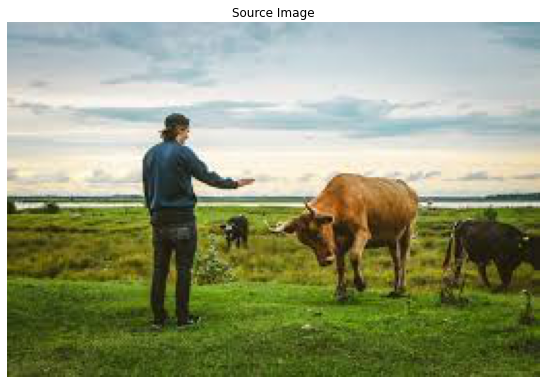

In [ ]:
# read "image1.jpg" and plot
image1 = plt.imread('image1.jpg')
plt.subplot(121)
plt.imshow(image1)
plt.axis('off')
plt.title('Source Image')
plt.show()

In [ ]:
# apply yolov5s model on "image1.jpg"
!python detect.py --source image1.jpg --weights yolov5s.pt --project infer_yolov5s

detect: weights=['yolov5s.pt'], source=image1.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=infer_yolov5s, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-135-g7926afc torch 1.10.0+cu111 CPU

100% 14.1M/14.1M [00:00<00:00, 107MB/s] 

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
image 1/1 /content/yolov5/image1.jpg: 448x640 1 person, 3 cows, Done. (0.315s)
Speed: 3.0ms pre-process, 314.9ms inference, 16.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to infer_yolov5s/exp


In [ ]:
# apply yolov5x model on "image1.jpg"
!python detect.py --source image1.jpg --weights yolov5x.pt --project infer_yolov5x

detect: weights=['yolov5x.pt'], source=image1.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=infer_yolov5x, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-135-g7926afc torch 1.10.0+cu111 CPU

100% 166M/166M [00:11<00:00, 14.5MB/s]

Fusing layers... 
YOLOv5x summary: 444 layers, 86705005 parameters, 0 gradients, 205.7 GFLOPs
image 1/1 /content/yolov5/image1.jpg: 448x640 1 person, 4 cows, Done. (2.655s)
Speed: 3.2ms pre-process, 2655.0ms inference, 1.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to infer_yolov5x/exp


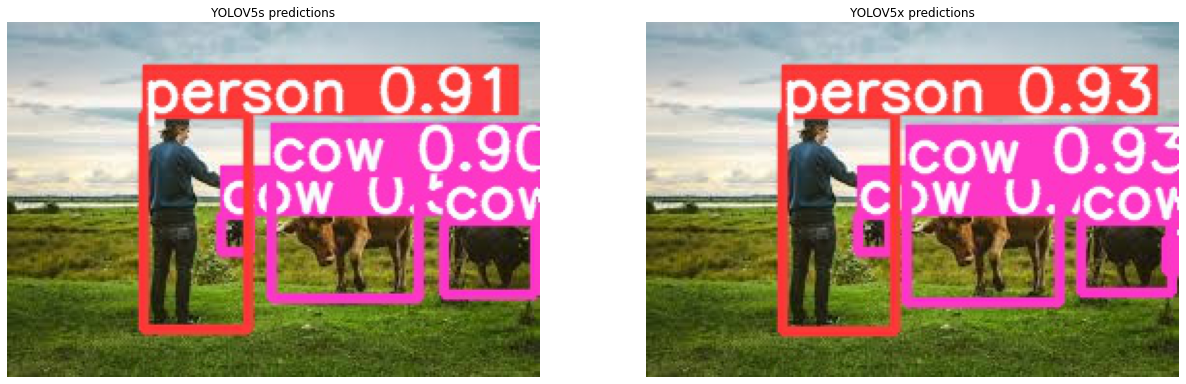

In [ ]:
# show object recognition results on "image1.jpg" for both yolov5s and yolov5x models
image1a = plt.imread('/content/yolov5/infer_yolov5s/exp/image1.jpg')
image1b = plt.imread('/content/yolov5/infer_yolov5x/exp/image1.jpg')

plt.subplot(121)
plt.imshow(image1a)
plt.axis('off')
plt.title('YOLOV5s predictions')

plt.subplot(122)
plt.imshow(image1b)
plt.axis('off')
plt.title('YOLOV5x predictions')

plt.show()

In [ ]:
# encrypt image using XOR algorithm
# import numpy, cv2 and requests libraries
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import requests

# retrieve original image from Google Drive (cloud)
url = "https://drive.google.com/uc?id=1lvse1tfnih2rGflF-N2ZhVjegvaxLxC0&export=download"

# save retrieved image as "image1.jpg" in current directory
r = requests.get(url)
with open('image1.jpg', 'wb') as f:
   f.write(r.content)

# read shape of original image with cv2 library and generate encryption key
# source code credit to ProgrammerSought (2022)
img1 = cv2.imread("image1.jpg")
width, height, deep = img1.shape
imgKeyX = np.random.randint(0, 256, size=[width, height, deep], dtype=np.uint8)
cv2.imwrite("imgKeyX.jpg",imgKeyX)

# encrypt original image with key generated
imgEncryptX = cv2.bitwise_xor(img1, imgKeyX)
cv2.imwrite("imgEncryptX.jpg",imgEncryptX)

# save imgKeyX and imgEncryptX obtained to Google Drive (cloud) manually to get file id to facilitate remote file retrieval
# for real-life cases, the encryption key and encrypted image would be saved automatically to cloud server when images taken by cameras or sensors

True

In [ ]:
# retrieve encryption key from Google Drive (cloud)
import requests
urlkey = "https://drive.google.com/uc?id=16G1JL5aTp_E4Q5cH6D7_7r_ALGPX-yRl&export=download"
rkey = requests.get(urlkey)

# save retrieved key as "imgKeyXOR.jpg" in current directory
with open('imgKeyXOR.jpg', 'wb') as fkey:
   fkey.write(rkey.content)

In [ ]:
# retrieve encrypted image from Google Drive (cloud)
urlencrypt = "https://drive.google.com/uc?id=1swT0yRcOkvIC-7cBjBXjtJQqvPMvzAlW&export=download"
rencrypt = requests.get(urlencrypt)

# save retrieved encrypted image as "imgEncryptXOR.jpg" in current directory
with open('imgEncryptXOR.jpg', 'wb') as fencrypt:
   fencrypt.write(rencrypt.content)

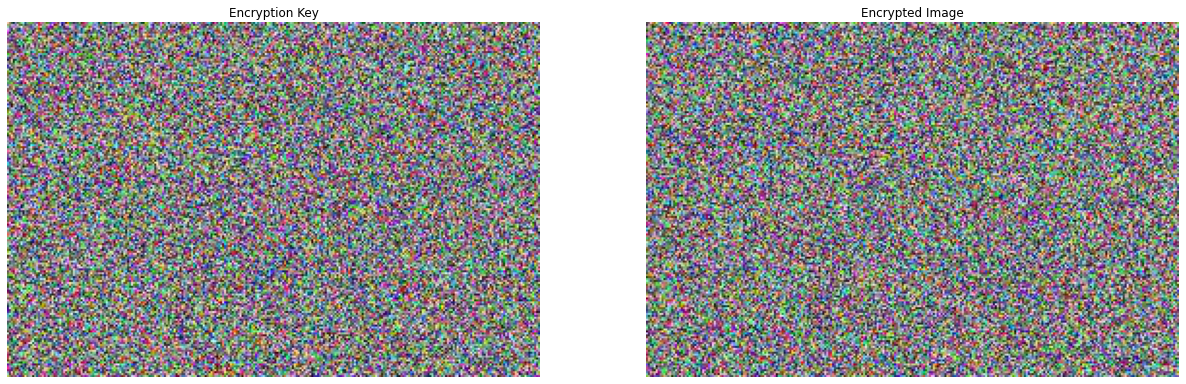

In [ ]:
# display retrieved encryption key and encrypted image 
imagekey = plt.imread('imgKeyXOR.jpg')
imageencrypt = plt.imread('imgEncryptXOR.jpg')

plt.subplot(121)
plt.imshow(imagekey)
plt.axis('off')
plt.title('Encryption Key')

plt.subplot(122)
plt.imshow(imageencrypt)
plt.axis('off')
plt.title('Encrypted Image')

plt.show()

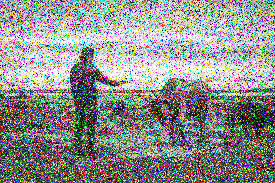

True

In [ ]:
# decrypt encrypted image
import cv2
from google.colab.patches import cv2_imshow
imagekey = cv2.imread('imgKeyXOR.jpg')
imageencrypt = cv2.imread('imgEncryptXOR.jpg')
imagedecrypt = cv2.bitwise_xor(imageencrypt, imagekey)
cv2_imshow(imagedecrypt)
cv2.imwrite("imgDecryptXOR.jpg",imagedecrypt)

# significant loss in resolution in decrypted image which are not suitable for performing object recognition.

     |████████████████████████████████| 446 kB 4.2 MB/s 
  Created wheel for pycrypto: filename=pycrypto-2.6.1-cp37-cp37m-linux_x86_64.whl size=499932 sha256=5fc76f57fbcbd5191933cdb146d0e6d5d15c7befc62f4b2a1e9a21f0148c05d1
  Stored in directory: /root/.cache/pip/wheels/cf/85/ba/bbd7c96add459de7598fb424e5ff2309baf2095c844ac0f191
Successfully built pycrypto


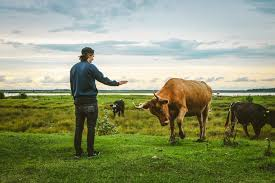

In [ ]:
# Encryption with DES
# source code credit to Chowdhury (2022)

# install pycrypto library
!pip install pycrypto

# import the necessary libraries
from Crypto.Cipher import DES
from secrets import token_bytes
from PIL import Image
from google.colab.patches import cv2_imshow
import cv2

#Taken three key from token bytes
key1=token_bytes(16)
key2=token_bytes(16)
key3=token_bytes(16)

#Encryption function using triple key
def encrypt(image):
  cipher1=DES.new(key1[0:8],DES.MODE_CBC,key1[8:16])
  ciphertext1=cipher1.encrypt(image)
  cipher2=DES.new(key2[0:8],DES.MODE_CBC,key2[8:16])
  ciphertext2=cipher2.decrypt(ciphertext1)
  cipher3=DES.new(key3[0:8],DES.MODE_CBC,key3[8:16])
  ciphertext3=cipher3.encrypt(ciphertext2)
  return ciphertext3

# import numpy and cv2 libraries
import numpy as np
from google.colab.patches import cv2_imshow

# retrieve original image from Google Drive (cloud)
import requests
url = "https://drive.google.com/uc?id=1lvse1tfnih2rGflF-N2ZhVjegvaxLxC0&export=download"

# save retrieved image as "image1.jpg" in current directory
r = requests.get(url)
with open('image1.jpg', 'wb') as f:
   f.write(r.content)
  
# show retrieved image  
img1 = cv2.imread("image1.jpg")
cv2_imshow(img1)

# Main function for process the image and call the encryption function
with open("image1.jpg", 'rb') as imagefile:
  image=imagefile.read()
while len(image)%8!=0:
  image+=b" "
ciphertext=encrypt(image)

#save encrypted image to file "imgEncryptDES.enc"
with open('imgEncryptDES.enc', 'wb') as f:
    f.write(ciphertext)

# save "imgEncryptDES.enc" obtained to Google Drive (cloud) manually to get file id to facilitate remote file retrieval
# for real-life cases, the ciphertext would be saved automatically to cloud server when images taken by cameras or sensors

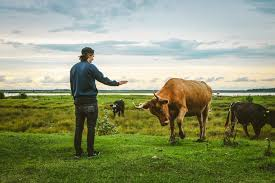

In [ ]:
# Decryption function
# Encryption and Descryption key is same
def decrypt(ciphertext):
  cipher1=DES.new(key3[0:8],DES.MODE_CBC,key3[8:16])
  plaintext1=cipher1.decrypt(ciphertext)
  cipher2=DES.new(key2[0:8],DES.MODE_CBC,key2[8:16])
  plaintext2=cipher2.encrypt(plaintext1)
  cipher3=DES.new(key1[0:8],DES.MODE_CBC,key1[8:16])
  plaintext3=cipher3.decrypt(plaintext2)
  return plaintext3

# retrieve encrypted image from Google Drive (cloud)
import requests
url = "https://drive.google.com/uc?id=1sITeSWgKSAeiRTIEJeM10iHZLC4Jm1dR&export=download"
r = requests.get(url)

# save retrieved encrypted image to "ciphertext"
with open('ciphertext', 'wb') as f:
   f.write(r.content)

# call the decryption function to decrypt encrypted image
plaintext=decrypt(ciphertext)

# save decrypted image to "imgDecryptDES.jpg"
with open("imgDecryptDES.jpg", 'wb') as f:
	f.write(plaintext)

# show the decrypted image
imgDecryptDES = cv2.imread("imgDecryptDES.jpg")
cv2_imshow(imgDecryptDES)

# the decrypted image is the same as the original image

In [ ]:
# apply yolov5s model on "image1.jpg"
!python detect.py --source "imgDecryptDES.jpg" --weights yolov5s.pt --project infer_yolov5s

# apply yolov5x model on "image1.jpg"
!python detect.py --source "imgDecryptDES.jpg" --weights yolov5x.pt --project infer_yolov5x

detect: weights=['yolov5s.pt'], source=imgDecryptDES.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=infer_yolov5s, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-135-g7926afc torch 1.10.0+cu111 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
image 1/1 /content/yolov5/imgDecryptDES.jpg: 448x640 1 person, 3 cows, Done. (0.314s)
Speed: 2.8ms pre-process, 313.8ms inference, 1.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to infer_yolov5s/exp2
detect: weights=['yolov5x.pt'], source=imgDecryptDES.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False

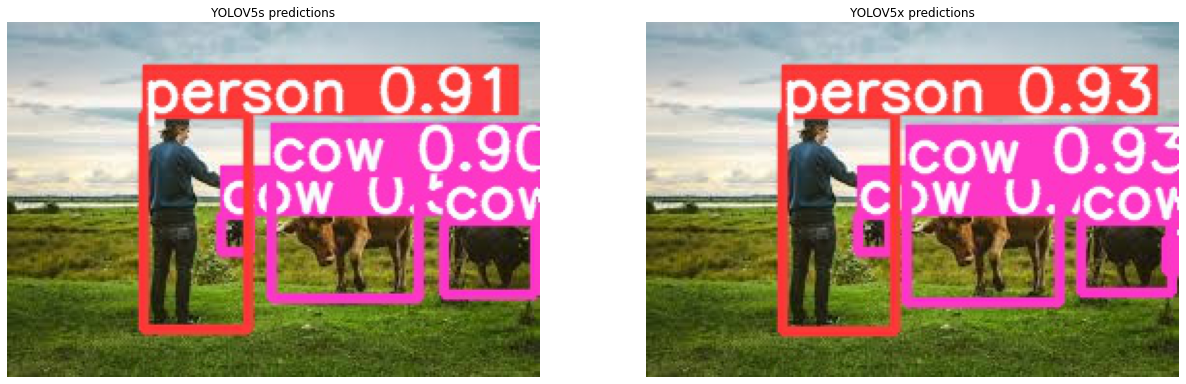

In [ ]:
# show object recognition results on "image1.jpg" for both yolov5s and yolov5x models
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = 21, 18
imgdec1a = plt.imread('/content/yolov5/infer_yolov5s/exp2/imgDecryptDES.jpg')
imgdec1b = plt.imread('/content/yolov5/infer_yolov5x/exp2/imgDecryptDES.jpg')

plt.subplot(121)
plt.imshow(imgdec1a)
plt.axis('off')
plt.title('YOLOV5s predictions')

plt.subplot(122)
plt.imshow(imgdec1b)
plt.axis('off')
plt.title('YOLOV5x predictions')

plt.show()